# Proyecto 4: ANALSIS DE SENTIMIENTO 


El análsis de sentimiento es útil para las empresas que saber que piensan sus compradores acerca de sus productos. A esto se le llama la retroalimentación del cliente. Este tipo de análisis es muy útil sobre todo para empresas de e-comence porqe disponen de un gran volumen de datos que les permite tomar acciones correctivas en su negocio antes de que las concecuencias sean irrevercibles (perdida masiva de clientes). También de las opiniones de los clientes se podría obtener información útil para innovar, desarrollar nuevos productos o mejorarlos. Ignorar es malo para el negocio.

### Mi punto de partida va ser el proyecto 3

En este proyecto voy a utlizar los datos procesados en el proyecto 3. Recordemos que se trata de calificaciones o reviews de productos comprados a través de Amazon. Por cada producto comprado tengo el comentario y el puntaje o estrella asignada. Teoricamente el comentario debería estar relacionado al puntaje o estrella asiganda. 

### Objetivo

**Determinar si un comentario es Positivo o Negativo en base a los comentarios que deja el comprador.** 

Vamos a tomar como Positivos los comentarios calificados con 5 y 4 estrellas y negativos aquellos calificados con 2 y 1 estrellas

**Importo las librerías necesarias para el desarrollo del trabajo**

In [2]:
!pip install wordcloud

In [3]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
stop_words = set(nltk.corpus.stopwords.words('spanish'))
from nltk.tokenize import RegexpTokenizer
import pandas_profiling as pdp
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import es_core_news_sm
import re
from unicodedata import normalize
import gc
gc.enable()
from spellchecker import SpellChecker
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Cargamos los datasets**

In [5]:
dataset_dev = pd.read_json('C:/Users/Gabriel/OneDrive/Documentos/OneDrive/DATA SCIENCE/PROYECTOS/Proyecto3/NLP/dataset_amazon/dataset_es_dev.json', lines= True)
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [6]:
dataset_test = pd.read_json('C:/Users/Gabriel/OneDrive/Documentos/OneDrive/DATA SCIENCE/PROYECTOS/Proyecto3/NLP/dataset_amazon/dataset_es_test.json', lines= True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [7]:
dataset_train = pd.read_json('C:/Users/Gabriel/OneDrive/Documentos/OneDrive/DATA SCIENCE/PROYECTOS/Proyecto3/NLP/dataset_amazon/dataset_es_train.json', lines= True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


**Vemos cuantas filas y columnas tienen los dataset**

In [8]:
dataset_dev.shape

(5000, 8)

In [9]:
dataset_test.shape

(5000, 8)

In [10]:
dataset_train.shape

(200000, 8)

**Con el fin simplificar el procesamiento  de nuestros dataset vamos a unir los datos ya que poseen la misma información**



In [11]:
data=pd.concat([dataset_dev, dataset_test, dataset_train], axis=0)
data.shape

(210000, 8)

**Nuestro dataset**

In [12]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


**Verificamos si se generaron filas duplicadas**

In [13]:
duplicate_rows_df = data[data.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 8)


In [14]:
# visualizamos la información de nuestro nuevo dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


In [15]:
# vemos los nombres de las columnas
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

In [16]:
# vemos si hay datos nulos
data.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

### *Los Estudios indican que las criticas negativas normalmente incluyen mas palabras que las positivas* 
**Por esta razon vamos a efectuar el siguiente analisis**

**Review_body**

In [17]:
data['word_count'] = data["review_body"].apply(lambda x: len(str(x).split()))
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,word_count
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,10
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,8
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,28
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,52
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,10


In [18]:
plt.figure(figsize=(16,8))

b=sns.barplot(data = data, x = "stars", y = "word_count", palette= 'coolwarm')
plt.title('Cantidad de palabras por calificación', fontsize= 25)
plt.xlabel('stars', fontsize=20)
plt.ylabel('Número de palabras', fontsize=20)
b.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

<ipython-input-18-9ee497864b7f>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


**Los resultados confirman que las reseñas negativas tienen más palabras que las positivas, es posible que este comportamiento se deba a que cuando no estamos conformes con un producto o nos sentimos estafados nos esforcemos más en expresar nuestro malestar. Es importante tener en cuenta este resultado a la hora de entrenar un modelo predictivo. Si bien en número de reviews por estrella está balanceado, el número de palabras no lo está, volveremos hacer este análisis luego de procesar el texto antes de entrenar los modelos. 

### ANÁLISIS DE LOS EMOTICONES 

Para hacer el análisis de los emoticones necesitamos el texto virgen de los comentarios, sin procesar, para poder extraer los emoticones los cuales están constituidos por caracteres especiales. 

In [19]:
sent_analys=data.drop(['review_id','product_id','reviewer_id','language','product_category', 'word_count'], axis=1)

In [20]:
sent_analys.head()

,stars,review_body,review_title
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra
1,1,No he recibido el pedido no la devolución,No lo he recibido
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta


In [21]:
sent_analys['stars'].value_counts()

1    42000
2    42000
3    42000
4    42000
5    42000
Name: stars, dtype: int64

**Separamos los comentarios Positivos (estrellas 4 y 5) y Negativos (estrellas 1 y 2)**

In [22]:
reviews_positivos = sent_analys[sent_analys.stars>=4]

reviews_negativos = sent_analys[sent_analys.stars<=2]

In [23]:
reviews_positivos.head()

,stars,review_body,review_title
3000,4,Son robustas y francamente cumplen con su come...,Gran juego de llaves.
3001,4,Estupenda relación calidad-precio,Funcional
3002,4,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo
3003,4,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN
3004,4,Le doy cuatro estrellas porque aún no lo he pr...,Nice.


In [24]:
reviews_negativos.head()

,stars,review_body,review_title
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra
1,1,No he recibido el pedido no la devolución,No lo he recibido
2,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar
3,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla
4,1,No me gusta su olor a viejo y aspecto malo,No me gusta


A fines práctivos para unificar las etiquetas vamos a renombrarlas de la siguiente forma: Positivas(4 y 5)=1 y Negativas(1 y 2)=2

In [25]:
reviews_positivos['stars'].replace(to_replace= [4, 5], value=1, inplace=True)

C:\Users\Gabriel\miniconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [26]:
reviews_positivos.head()

,stars,review_body,review_title
3000,1,Son robustas y francamente cumplen con su come...,Gran juego de llaves.
3001,1,Estupenda relación calidad-precio,Funcional
3002,1,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo
3003,1,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN
3004,1,Le doy cuatro estrellas porque aún no lo he pr...,Nice.


In [27]:
reviews_negativos['stars'].replace(to_replace= [1, 2], value=0, inplace=True)

C:\Users\Gabriel\miniconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
reviews_negativos.head()

,stars,review_body,review_title
0,0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra
1,0,No he recibido el pedido no la devolución,No lo he recibido
2,0,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar
3,0,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla
4,0,No me gusta su olor a viejo y aspecto malo,No me gusta


In [29]:
rev_pos_body= reviews_positivos['review_body'].tolist()
rev_neg_body= reviews_negativos['review_body'].tolist()
rev_pos_title= reviews_positivos['review_title'].tolist()
rev_neg_title= reviews_negativos['review_title'].tolist()

In [30]:
rev_pos_corpus_body = ' '.join([str(elem) for elem in rev_pos_body]).lower()
rev_neg_corpus_body = ' '.join([str(elem) for elem in rev_neg_body]).lower()
rev_pos_corpus_title = ' '.join([str(elem) for elem in rev_pos_title]).lower()
rev_neg_corpus_title = ' '.join([str(elem) for elem in rev_neg_title]).lower()

In [31]:
import re
def find_emo(text):
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    return emoticons

### review_body

In [32]:
rev_pos_emo_body= find_emo(rev_pos_corpus_body)
rev_pos_emo_body[:10]

[':)', ':-)', ':)', ':)', ':)', ';-)', ';)', ':)', ':)', ':)']

In [33]:
rev_neg_emo_body= find_emo(rev_neg_corpus_body)
rev_neg_emo_body[:10]

['=(', ':-)', ':-(', ':(', ':(', ':(', ':-(', ':(', ':)', ':)']

### review_title

In [34]:
rev_pos_emo_title= find_emo(rev_pos_corpus_title)
rev_pos_emo_title[:10]

[':-)', ':)', ':)', ':)', ':)', ';-)', ';)', ';)', ':-)', ':)']

In [35]:
rev_neg_emo_title= find_emo(rev_neg_corpus_title)
rev_neg_emo_title[:10]

[':(', ':(', ':(', ':(', ':(', ':-(', ':)', ':(', ':(', ':-(']

**Podemos ver, en los primeros 10 emoticones, que en los comentarios positivos aparecen solo caras sonriendo, sin embargo, en los comentarios negativos de review_body en su mayoría son caras tristes, solo 3 están sonriendo, lo cual no indica que sean positivas, pueden indicar ironía en cierto contexto. En el caso de review_title en los comentarios negativos hay solo una carita feliz, lo cual indicaría un mayor accuracy al trabajar con titulares.**

**Este análisis, realizado con la librería "re", se puede incorporar en los algoritmos de análisis de sentimiento.**

In [36]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "product_category", palette= 'coolwarm',
                   order = data.product_category.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.ylabel("Cantidad")
plt.xlabel("Categoria")
plt.title("Cantidad segun categoria de producto")
plt.show()

<ipython-input-36-b56a352378b3>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


### PREPROCESAMIENTO: FILTRADO DE PALABRAS QUE NO SEAN ADJETIVOS. 

Como vimos en le proyecto 3, el lematizador de Spacy no utiliza POSTag para llevar las palabras a su forma raíz, por este motivo, vamos a utilizar otro algoritmo para filtrar los comentarios y quedarnos solo con los palabras que sean ADJETIVOS. 

Hay trabajos publicados que muestran que los adjetivos estan significativamente correlacionados con la polaridad del sentimiento (positivo o negativo), lo cual es lógico ya que es el tipo de palabra a la expresión de los sentimientos. 

https://towardsdatascience.com/text-sentiment-analysis-in-nlp-ce6baba6d466#:~:text=Sentiment%20analysis%20in%20NLP%20is%20about%20deciphering%20such,blurry%2C%20inexpensive%2C%20%E2%80%A6%20%28Not%20just%20positive%20or%20negative.%29

**Luego de realizar la limpieza las palabras que aparecen con mayor frecuencia son más relevantes para cada grupo de calificaciones**

In [37]:
df_pos_neg=pd.concat([reviews_negativos, reviews_positivos])

In [38]:
df_pos_neg.rename(columns = {'stars':'rev_neg0_pos1'}, inplace = True)

In [39]:
df_pos_neg.head()

,rev_neg0_pos1,review_body,review_title
0,0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra
1,0,No he recibido el pedido no la devolución,No lo he recibido
2,0,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar
3,0,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla
4,0,No me gusta su olor a viejo y aspecto malo,No me gusta


In [40]:
df_pos_neg.tail()

,rev_neg0_pos1,review_body,review_title
199995,1,Mando funciona perfectamente y cumple con toda...,Tal y como se describe
199996,1,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente
199997,1,Buena calidad. Satisfecha con la compra.,Buena calidad.
199998,1,Perfecto para el cumple de mi hijo,Recomendado
199999,1,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas


In [41]:
df_pos_neg.isna().sum()

rev_neg0_pos1    0
review_body      0
review_title     0
dtype: int64

In [42]:
import re, string, unicodedata
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

In [43]:
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [44]:
body_list=[]

for titular in df_pos_neg.review_body:
   
    # Vamos a reemplazar los caracteres que no sean letras por espacios o números
    titular=clean_text(titular)
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Quitamos los tildes
    titular= strip_accents(titular)
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stop_words]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    body_list.append(titular)

In [45]:
df_pos_neg["body_clean"]= body_list

In [46]:
title_list=[]

for titular in df_pos_neg.review_title:
   
    # Vamos a reemplazar los caracteres que no sean letras por espacios o números
    titular=clean_text(titular)
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Quitamos los tildes
    titular= strip_accents(titular)
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stop_words]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    title_list.append(titular)

In [47]:
df_pos_neg["title_clean"]= title_list

In [48]:
df_pos_neg.head()

,rev_neg0_pos1,review_body,review_title,body_clean,title_clean
0,0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,malisimo grande demasiado aparatoso protector ...,mala compra
1,0,No he recibido el pedido no la devolución,No lo he recibido,recibido pedido devolucion,recibido
2,0,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,buscar sistema funciona bien abrazadera lleva ...,aprieta bien manillar
3,0,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,utilice brocas menor diametro doblaron varias ...,brocas mantequilla
4,0,No me gusta su olor a viejo y aspecto malo,No me gusta,gusta olor viejo aspecto malo,gusta


In [49]:
import spacy
nlp = spacy.load('es_core_news_sm')

def lemmatizer(text):  
    doc = nlp(text)
    return ' '.join([word.lemma_ for word in doc])

In [50]:
df_pos_neg['body_clean'] =df_pos_neg['body_clean'].apply(lambda x: lemmatizer(x))

In [51]:
df_pos_neg.rename(columns = {'body_clean':'body_lema'}, inplace = True)

In [52]:
df_pos_neg['title_clean'] =df_pos_neg['title_clean'].apply(lambda x: lemmatizer(x))

In [53]:
df_pos_neg.rename(columns = {'title_clean':'title_lema'}, inplace = True)

In [54]:
df_pos_neg.head(15)

,rev_neg0_pos1,review_body,review_title,body_lema,title_lema
0,0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,malisimo grande demasiado aparatoso protector ...,malo compra
1,0,No he recibido el pedido no la devolución,No lo he recibido,recibido pedido devolucion,recibido
2,0,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,buscar sistema funcionar bien abrazaderar llev...,aprieto bien manillar
3,0,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,utilizar broca menor diametro doblar varios ma...,broca mantequilla
4,0,No me gusta su olor a viejo y aspecto malo,No me gusta,gustar olor viejo aspecto malo,gustar
5,0,"Hola, después de recoger el paquete me ha lleg...",Bolas rotas,hola despues recoger paquete llegado bolo rota,bola roto
6,0,"A parte de no poder elegir color, te envian el...",A parte de no poder elegir color...,parte poder elegir color enviar cesto color im...,parte poder elegir color
7,0,Muy baja calidad de ahí si precio. Esta compra...,Tapa pantalla,bajo calidad precio compra suponer tirar dinero,tapa pantalla
8,0,El producto sale como entregado pero yo no he ...,NO HE RECIBIDO EL PRODUCTO,producto salir entregado recibido,recibido producto
9,0,"No lo recomiendo, no se pega y acaba despegandose",Una patata.,recomeir pega acabar despegar él,patatar


**VAMOS ANALIZAR LAS FRECUENCIA DE LAS PALABRAS LUEGO DEL PRE-PROCESAMIENTO**

In [55]:
body_lema= []
regexp=RegexpTokenizer(r"\w+")

for i in range(df_pos_neg.shape[0]):
    x = df_pos_neg.iloc[i].body_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    body_lema.append(x) 

In [56]:
words_body=[line for line in  body_lema for line in set(line)]
words_body= Counter(words_body)
words_body= words_body.most_common(50)
words_body=pd.DataFrame(words_body,columns = ['Words', 'Frequency'])
words_body.head(10)

,Words,Frequency
0,bien,33991
1,él,24964
2,buen,24757
3,calidad,23831
4,producto,20087
5,poder,17216
6,precio,15766
7,hacer,15326
8,funcionar,12684
9,perfecto,11466


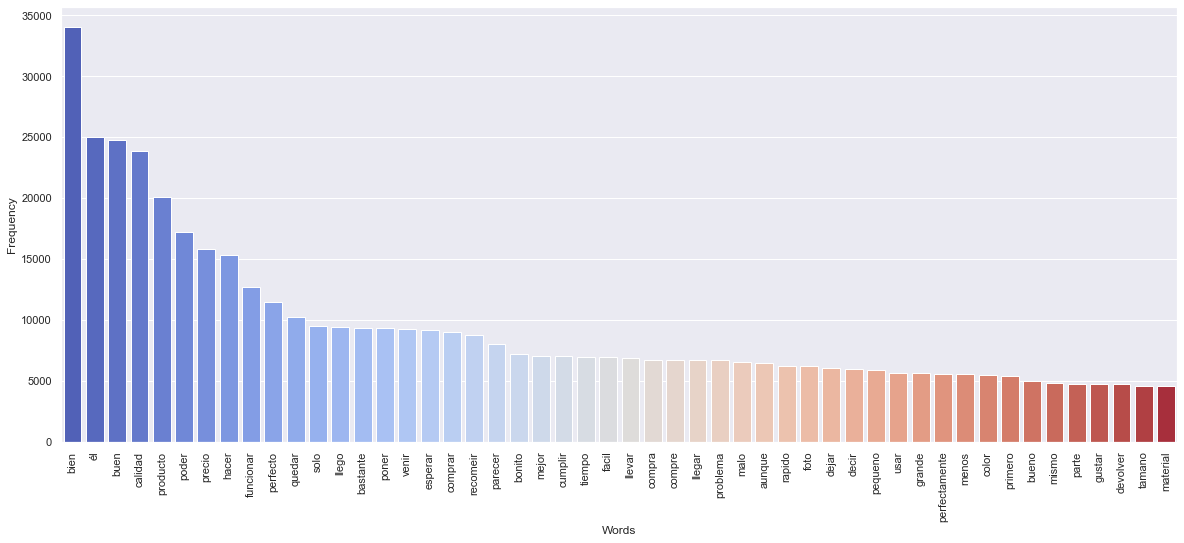

In [57]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.figure(figsize = (20,8))
plot = sns.barplot(x  = words_body['Words'] , y = words_body['Frequency'],  palette= 'coolwarm')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Como podemos ver a pesar de haber hecho un exaustivo pre-procesamiento siguen quedando palabras de poca relevancia con una alta frecuencia. Vamos armar una lista con estas palabras para sacarlas del corpus.  

In [58]:
new_list= ['él', 'producto', 'poder', 'hacer', 'solo', 'llegar', 'comprar', 'poner', 'recomeir', 'venir', 'llegado', 'quedar', 'decir', 'parecer', 'dejar', 'compre', 'primero', 'mes', 'menos', 'días', 'despu', 'compra', 'llevar', 'mismo', 'semana']  

In [59]:
corr_list=[]

for titular in df_pos_neg.body_lema:
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in new_list]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    corr_list.append(titular)

In [60]:
df_pos_neg["body_lema"]= corr_list

In [61]:
df_pos_neg.head(20)

,rev_neg0_pos1,review_body,review_title,body_lema,title_lema
0,0,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,malisimo grande demasiado aparatoso protector ...,malo compra
1,0,No he recibido el pedido no la devolución,No lo he recibido,recibido pedido devolucion,recibido
2,0,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,buscar sistema funcionar bien abrazaderar agar...,aprieto bien manillar
3,0,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,utilizar broca menor diametro doblar varios ma...,broca mantequilla
4,0,No me gusta su olor a viejo y aspecto malo,No me gusta,gustar olor viejo aspecto malo,gustar
5,0,"Hola, después de recoger el paquete me ha lleg...",Bolas rotas,hola despues recoger paquete bolo rota,bola roto
6,0,"A parte de no poder elegir color, te envian el...",A parte de no poder elegir color...,parte elegir color enviar cesto color imagino ...,parte poder elegir color
7,0,Muy baja calidad de ahí si precio. Esta compra...,Tapa pantalla,bajo calidad precio suponer tirar dinero,tapa pantalla
8,0,El producto sale como entregado pero yo no he ...,NO HE RECIBIDO EL PRODUCTO,salir entregado recibido,recibido producto
9,0,"No lo recomiendo, no se pega y acaba despegandose",Una patata.,pega acabar despegar,patatar


### Nos quedamos solo con las columnas que nos importan

In [63]:
df_pos_neg = df_pos_neg.drop(['review_body', 'review_title'],axis=1)
df_pos_neg.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
df_pos_neg.head()

,rev_neg0_pos1,body_lema,title_lema
0,0,malisimo grande demasiado aparatoso protector ...,malo compra
1,0,recibido pedido devolucion,recibido
2,0,buscar sistema funcionar bien abrazaderar agar...,aprieto bien manillar
3,0,utilizar broca menor diametro doblar varios ma...,broca mantequilla
4,0,gustar olor viejo aspecto malo,gustar


**Volvemos hacer una revisión de las 50 palabras más frecuentes**

In [64]:
words_corr= []
regexp=RegexpTokenizer(r"\w+")

for i in range(df_pos_neg.shape[0]):
    x = df_pos_neg.iloc[i].body_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    words_corr.append(x) 

In [65]:
wordsC=[line for line in  words_corr for line in set(line)]
wordsC= Counter(wordsC)
wordsC= wordsC.most_common(50)
wordsC=pd.DataFrame(wordsC,columns = ['Words', 'Frequency'])
wordsC.head(50)

,Words,Frequency
0,bien,33991
1,buen,24757
2,calidad,23831
3,precio,15766
4,funcionar,12684
5,perfecto,11466
6,llego,9416
7,bastante,9360
8,esperar,9162
9,bonito,7214


**Como podemos ver quedan algunas palabras que se podrían sacar pero mejoró mucho, ahora las primeras 20 palabras son mucho más relevantes a la hora a asignar una estrella**

### **Analizamos la frecuencia en review_title**

In [66]:
title_lema= []
regexp=RegexpTokenizer(r"\w+")

for i in range(df_pos_neg.shape[0]):
    x = df_pos_neg.iloc[i].title_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    title_lema.append(x) 

In [67]:
words_title=[line for line in  title_lema for line in set(line)]
words_title= Counter(words_title)
words_title= words_title.most_common(50)
words_title=pd.DataFrame(words_title,columns = ['Words', 'Frequency'])
words_title.head(10)

,Words,Frequency
0,buen,15809
1,calidad,12362
2,bien,8559
3,producto,6793
4,precio,5550
5,perfecto,5508
6,malo,5065
7,funcionar,3980
8,compra,3245
9,bonito,2814


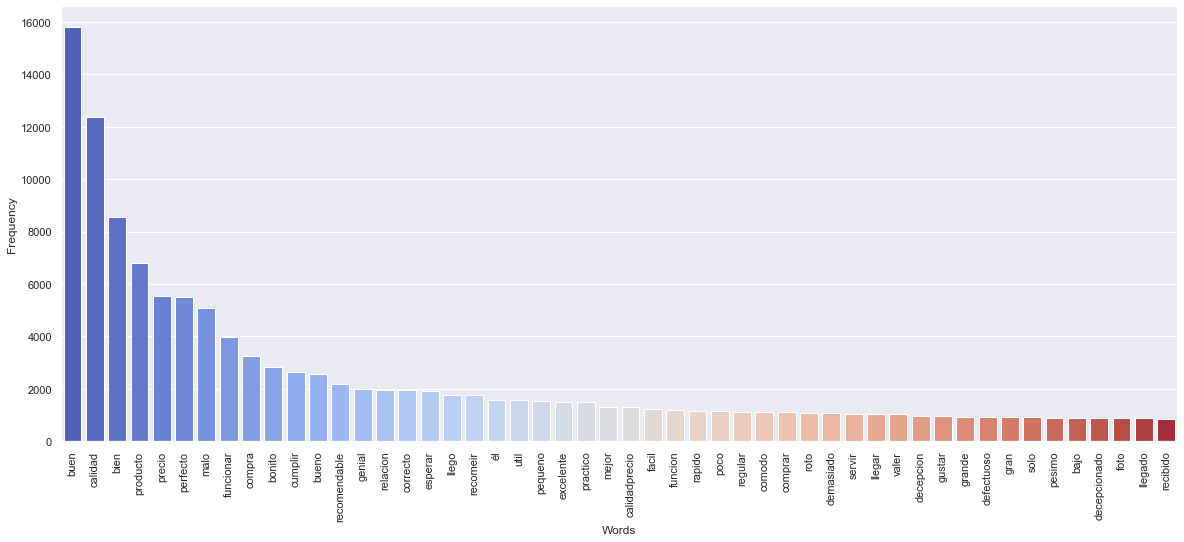

In [68]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.figure(figsize = (20,8))
plot = sns.barplot(x  = words_title['Words'] , y = words_title['Frequency'],  palette= 'coolwarm')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [69]:
new_list= ['él', 'producto', 'poder', 'hacer', 'solo', 'llegar', 'comprar', 'poner', 'recomeir', 'venir', 'llegado', 'quedar', 'decir', 'parecer', 'dejar', 'compre', 'primero', 'mes', 'menos', 'días', 'despu', 'compra', 'llevar', 'mismo', 'semana']  

In [70]:
title_list=[]

for titular in df_pos_neg.title_lema:
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in new_list]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    title_list.append(titular)

In [71]:
df_pos_neg["title_lema"]= title_list

In [72]:
df_pos_neg.head(20)

,rev_neg0_pos1,body_lema,title_lema
0,0,malisimo grande demasiado aparatoso protector ...,malo
1,0,recibido pedido devolucion,recibido
2,0,buscar sistema funcionar bien abrazaderar agar...,aprieto bien manillar
3,0,utilizar broca menor diametro doblar varios ma...,broca mantequilla
4,0,gustar olor viejo aspecto malo,gustar
5,0,hola despues recoger paquete bolo rota,bola roto
6,0,parte elegir color enviar cesto color imagino ...,parte elegir color
7,0,bajo calidad precio suponer tirar dinero,tapa pantalla
8,0,salir entregado recibido,recibido
9,0,pega acabar despegar,patatar


In [73]:
df_pos_neg.isna().sum()

rev_neg0_pos1    0
body_lema        0
title_lema       0
dtype: int64

### Veamos si el número de palabras está balanceado entre las clases

### review_body

In [75]:
df_pos_neg['word_count_body'] = df_pos_neg["body_lema"].apply(lambda x: len(str(x).split()))
df_pos_neg.head()

,rev_neg0_pos1,body_lema,title_lema,word_count_body
0,0,malisimo grande demasiado aparatoso protector ...,malo,6
1,0,recibido pedido devolucion,recibido,3
2,0,buscar sistema funcionar bien abrazaderar agar...,aprieto bien manillar,13
3,0,utilizar broca menor diametro doblar varios ma...,broca mantequilla,22
4,0,gustar olor viejo aspecto malo,gustar,5


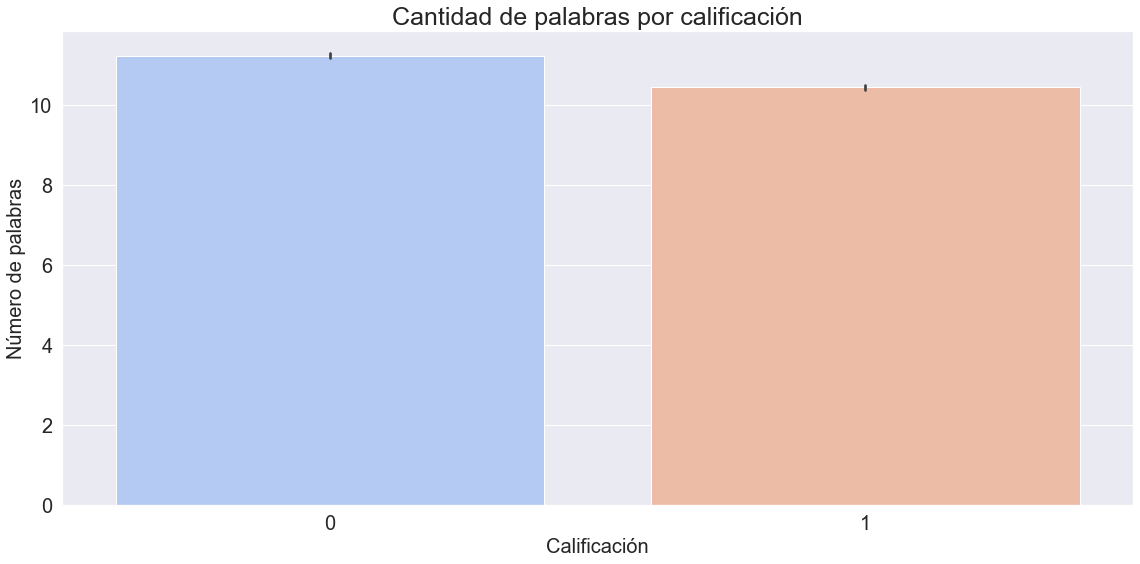

In [77]:
plt.figure(figsize=(16,8))

b=sns.barplot(data = df_pos_neg, x = "rev_neg0_pos1", y = "word_count_body", palette= 'coolwarm')
plt.title('Cantidad de palabras por calificación', fontsize= 25)
plt.xlabel('Calificación', fontsize=20)
plt.ylabel('Número de palabras', fontsize=20)
b.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

**Como podemos ver sigue habiendo un desbalance en el número de palabras entre los reviews positivos y negativos.**

### review_title

In [78]:
df_pos_neg['word_count_title'] = df_pos_neg["title_lema"].apply(lambda x: len(str(x).split()))
df_pos_neg.head()

,rev_neg0_pos1,body_lema,title_lema,word_count_body,word_count_title
0,0,malisimo grande demasiado aparatoso protector ...,malo,6,1
1,0,recibido pedido devolucion,recibido,3,1
2,0,buscar sistema funcionar bien abrazaderar agar...,aprieto bien manillar,13,3
3,0,utilizar broca menor diametro doblar varios ma...,broca mantequilla,22,2
4,0,gustar olor viejo aspecto malo,gustar,5,1


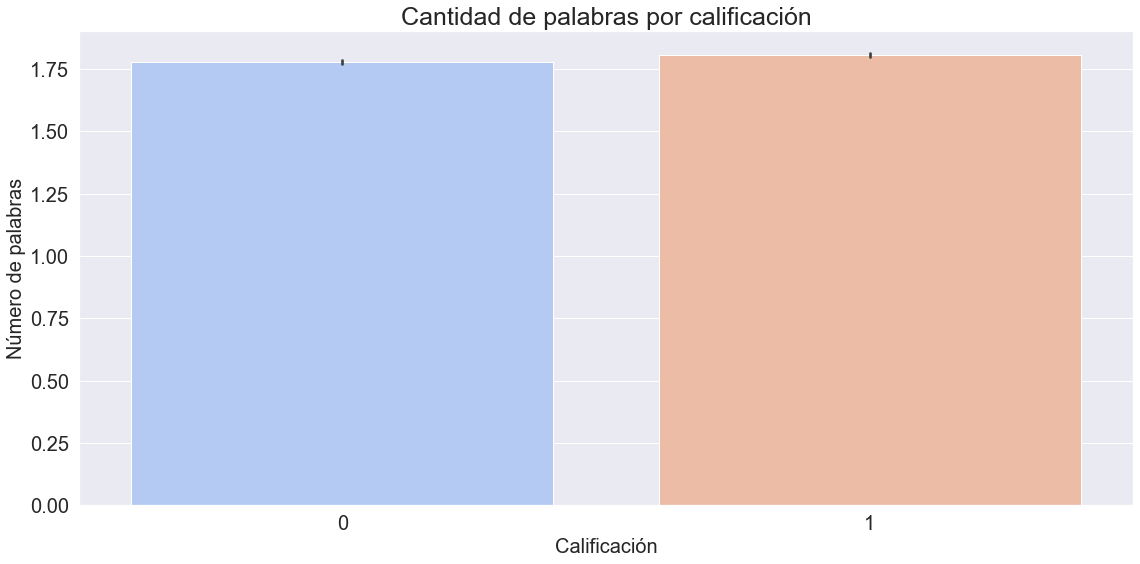

In [79]:
plt.figure(figsize=(16,8))

b=sns.barplot(data = df_pos_neg, x = "rev_neg0_pos1", y = "word_count_title", palette= 'coolwarm')
plt.title('Cantidad de palabras por calificación', fontsize= 25)
plt.xlabel('Calificación', fontsize=20)
plt.ylabel('Número de palabras', fontsize=20)
b.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

En el caso de los títulos la diferencia es más marcada

### FRECUENCIA DE PALABRAS EN COMENTARIOS POSITIVOS Y NEGATIVOS

In [80]:
# Vuelvo a separar el dataframe en reviews Positivos y Negativos

reviews_positivos = df_pos_neg[df_pos_neg.rev_neg0_pos1==1]

reviews_negativos = df_pos_neg[df_pos_neg.rev_neg0_pos1==0]

In [81]:
# Veamos si las clases están balaceadas
reviews_positivos.shape

(84000, 5)

In [82]:
reviews_negativos.shape

(84000, 5)

### review_body

**POSITIVAS**

In [83]:
positivas = []
regexp=RegexpTokenizer(r"\w+")

for i in range(reviews_positivos.shape[0]):
    x = reviews_positivos.iloc[i].body_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    positivas.append(x) 

In [84]:
words_positivas=[line for line in positivas for line in set(line)]
words_positivas = Counter(words_positivas)
words_positivas = words_positivas.most_common(20)
words_positivas=pd.DataFrame(words_positivas,columns = ['Words', 'Frequency'])
words_positivas.head(10)

,Words,Frequency
0,bien,21140
1,buen,19946
2,calidad,14181
3,precio,11330
4,perfecto,10203
5,facil,5830
6,bastante,5830
7,cumplir,5450
8,funcionar,5321
9,perfectamente,4841


**NEGATIVAS**

In [85]:
negativas = []
regexp=RegexpTokenizer(r"\w+")

for i in range(reviews_negativos.shape[0]):
    x = reviews_negativos.iloc[i].body_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    negativas.append(x) 

In [86]:
words_negativas=[line for line in negativas for line in set(line)]
words_negativas = Counter(words_negativas)
words_negativas = words_negativas.most_common(20)
words_negativas=pd.DataFrame(words_negativas,columns = ['Words', 'Frequency'])
words_negativas.head(10)

,Words,Frequency
0,bien,12851
1,calidad,9650
2,funcionar,7363
3,malo,5608
4,esperar,5549
5,llego,5252
6,buen,4811
7,precio,4436
8,devolver,4401
9,bastante,3530


### Visualizamos las palabras más frecuentes

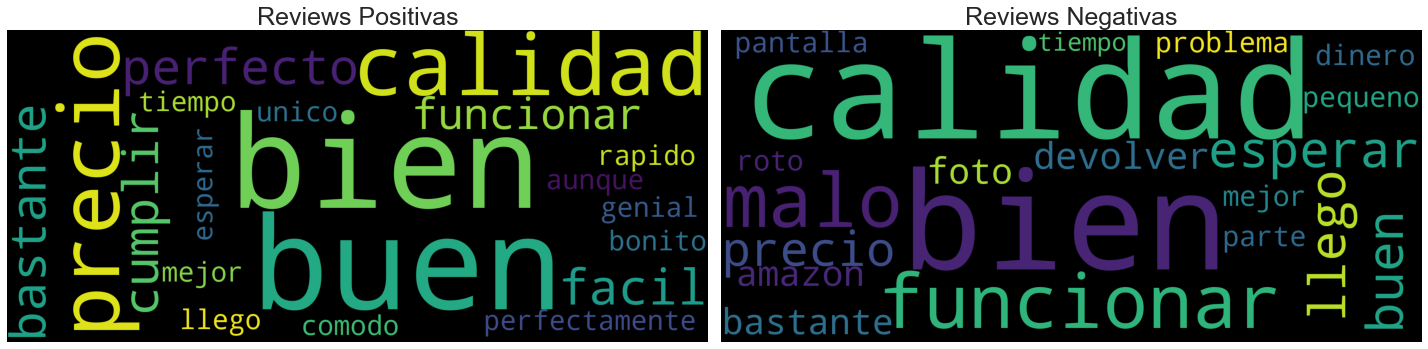

In [87]:
plt.figure(figsize=(20,15))

plt.subplot(121)
pos=(" ").join(words_positivas["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(pos)
plt.imshow(wc)
plt.axis("off")
plt.title('Reviews Positivas', fontsize=25)

plt.subplot(122)
neg=(" ").join(words_negativas["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(neg)
plt.imshow(wc)
plt.axis("off")
plt.title('Reviews Negativas', fontsize=25)



plt.tight_layout()
plt.show()

Como podemos ver no hay una difrencia clara entre las palabras más frecuentes en los reviews positivos y negativos. Solo se destacan entre los reviews negativos las palabra "malo", "devolver", "problema" y "roto" en tamaño medio a pequeño. Como vimos anteriormente los reviews negativos poseen una mayor contidad de palabras pero no se ve reflejada en una mayor cantidad de palabras con connotación negativa cuendo analizamos las frecuencias. 

### review_title

**POSITIVAS**

In [88]:
positivas = []
regexp=RegexpTokenizer(r"\w+")

for i in range(reviews_positivos.shape[0]):
    x = reviews_positivos.iloc[i].title_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    positivas.append(x) 

In [89]:
words_positivas=[line for line in positivas for line in set(line)]
words_positivas = Counter(words_positivas)
words_positivas = words_positivas.most_common(20)
words_positivas=pd.DataFrame(words_positivas,columns = ['Words', 'Frequency'])
words_positivas.head(10)

,Words,Frequency
0,buen,14480
1,calidad,6853
2,bien,6279
3,perfecto,5381
4,precio,4707
5,bonito,2218
6,bueno,2149
7,cumplir,2000
8,genial,1958
9,relacion,1822


**NEGATIVAS**

In [90]:
negativas = []
regexp=RegexpTokenizer(r"\w+")

for i in range(reviews_negativos.shape[0]):
    x = reviews_negativos.iloc[i].title_lema
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    negativas.append(x) 

In [91]:
words_negativas=[line for line in negativas for line in set(line)]
words_negativas = Counter(words_negativas)
words_negativas = words_negativas.most_common(20)
words_negativas=pd.DataFrame(words_negativas,columns = ['Words', 'Frequency'])
words_negativas.head(10)

,Words,Frequency
0,calidad,5509
1,malo,5009
2,funcionar,2799
3,bien,2280
4,llego,1448
5,buen,1329
6,esperar,1230
7,pequeno,1098
8,poco,1067
9,roto,1063


### Visualizamos las palabras más frecuentes

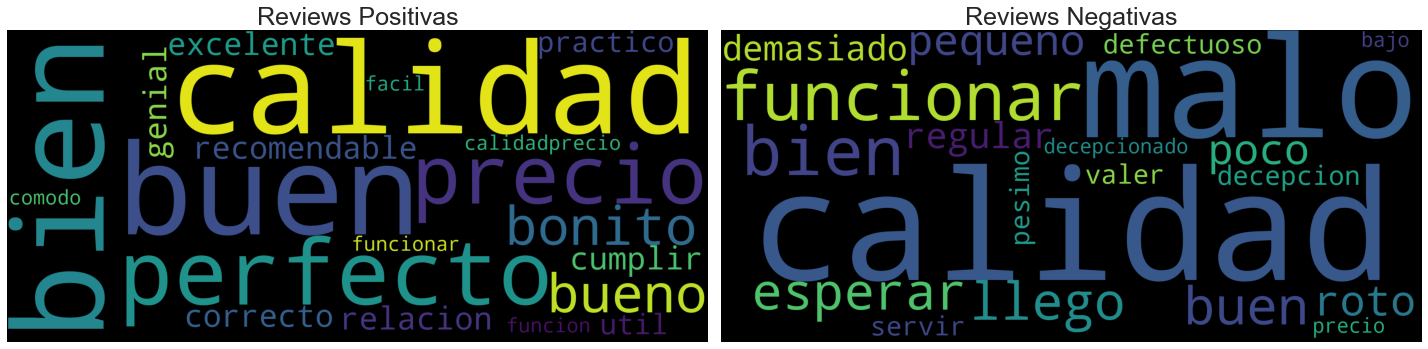

In [92]:
plt.figure(figsize=(20,15))

plt.subplot(121)
pos=(" ").join(words_positivas["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(pos)
plt.imshow(wc)
plt.axis("off")
plt.title('Reviews Positivas', fontsize=25)

plt.subplot(122)
neg=(" ").join(words_negativas["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(neg)
plt.imshow(wc)
plt.axis("off")
plt.title('Reviews Negativas', fontsize=25)



plt.tight_layout()
plt.show()

En este caso se ve un diferencia más marcada en palabras positivas y negativas, solo aparece buen en los títulos negativos. Estimo que un moledo entrenado con estos datos tendrá menos error.

### **VECTORIZACIÓN**

In [117]:
df_pos_neg.head(2)

,rev_neg0_pos1,body_lema,title_lema
0,0,malisimo grande demasiado aparatoso protector ...,malo
1,0,recibido pedido devolucion,recibido


Nos quedamos solo con las columnas con las que vamos a trabajar

In [94]:
df_pos_neg=df_pos_neg.drop(['word_count_body', 'word_count_title'],axis=1)

In [118]:
df_pos_neg_body=df_pos_neg.drop(['title_lema'],axis=1)

In [119]:
df_pos_neg_body.head()

,rev_neg0_pos1,body_lema
0,0,malisimo grande demasiado aparatoso protector ...
1,0,recibido pedido devolucion
2,0,buscar sistema funcionar bien abrazaderar agar...
3,0,utilizar broca menor diametro doblar varios ma...
4,0,gustar olor viejo aspecto malo


In [107]:
df_pos_neg_body.isna().sum()

rev_neg0_pos1    0
title_lema       0
dtype: int64

In [120]:
df_pos_neg_title=df_pos_neg.drop(['body_lema'],axis=1)

In [121]:
df_pos_neg_title.head(20)

,rev_neg0_pos1,title_lema
0,0,malo
1,0,recibido
2,0,aprieto bien manillar
3,0,broca mantequilla
4,0,gustar
5,0,bola roto
6,0,parte elegir color
7,0,tapa pantalla
8,0,recibido
9,0,patatar


In [109]:
df_pos_neg_title.isna().sum()

rev_neg0_pos1    0
title_lema       0
dtype: int64

Como podemos ver isna() no reconoce las filas vacias en df_pos_neg_title, tengo que reemplazar esos espacios vacios con datos nulos para luego quitar esas filas

In [123]:
df_pos_neg_title['title_lema'].replace('', np.nan, inplace=True)
df_pos_neg_title.head(20)

,rev_neg0_pos1,title_lema
0,0,malo
1,0,recibido
2,0,aprieto bien manillar
3,0,broca mantequilla
4,0,gustar
5,0,bola roto
6,0,parte elegir color
7,0,tapa pantalla
8,0,recibido
9,0,patatar


In [124]:
df_pos_neg_title.isna().sum()

rev_neg0_pos1       0
title_lema       7343
dtype: int64

In [125]:
df_pos_neg_title.dropna(inplace=True)

In [127]:
df_pos_neg_title.isna().sum()

rev_neg0_pos1    0
title_lema       0
dtype: int64

In [128]:
df_pos_neg_title.head(20)

,rev_neg0_pos1,title_lema
0,0,malo
1,0,recibido
2,0,aprieto bien manillar
3,0,broca mantequilla
4,0,gustar
5,0,bola roto
6,0,parte elegir color
7,0,tapa pantalla
8,0,recibido
9,0,patatar


In [145]:
df_pos_neg_title.shape

(160657, 2)

In [146]:
df_pos_neg_body.shape

(168000, 2)

In [249]:
# Tomamso la lista de palabras y el vector que nos dice si el review es negetivo o positivo. 
list_body = list(df_pos_neg_body['body_lema'].values)
list_title = list(df_pos_neg_title['title_lema'].values)
calificacion_body= df_pos_neg_body['rev_neg0_pos1'].values
calificacion_title=df_pos_neg_title['rev_neg0_pos1'].values

In [148]:
calificacion_title.shape

(160657,)

In [152]:
len(list_title)

160657

**Preparamos el conversor de bag of words a vectores que traemos de sklearn.**

In [250]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1, 2)) # stop_words="spanish" , ngram_range=(1, 2)
#cou_vec=TfidfVectorizer()

In [251]:
tfidf = TfidfVectorizer(max_features=1000,lowercase=False)

In [252]:
matriz_revs_body = tfidf.fit_transform(list_body)

# Tomamos las palabras
all_words = tfidf.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierto', 'abrir', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acierto', 'aconsejo', 'adaptador', 'adaptar', 'adapto', 'adecuado', 'adema', 'ademas', 'adhesivo', 'agradable', 'agua', 'aguantar', 'agujero', 'ahora', 'aire', 'ajusta', 'ajustado', 'ajustar', 'ajuste', 'alguien', 'algun', 'alguno', 'altavoz', 'alto', 'altura', 'amarillo', 'amazon', 'ambos', 'amplio', 'anadir', 'ancho', 'andar', 'anterior', 'antiguo', 'anunciar', 'anuncio', 'apagado', 'apagar', 'apago', 'aparato', 'aparecer']


In [253]:
matriz_revs_title = tfidf.fit_transform(list_title)

# Tomamos las palabras
all_words = tfidf.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abierto', 'abrir', 'absoluto', 'aburrido', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acero', 'acertado', 'acierto', 'aconsejable', 'aconsejo', 'acorde', 'adaptacion', 'adaptador', 'adaptar', 'adapto', 'adecuado', 'adherencia', 'adhesivo', 'agradable', 'agua', 'aguantar', 'agujero', 'ahora', 'aire', 'ajusta', 'ajustado', 'ajustar', 'ajuste', 'alberto', 'algun', 'alguno', 'altavoz', 'alto', 'altura', 'amarillo', 'amazon', 'amplio', 'ancho', 'angel', 'anonimo', 'antena', 'antonio', 'anunciado', 'anunciar', 'anuncio', 'apagar']


### MODELOS

#### 2.  *Evalúa de forma apropiada sus resultados. Justifica la métrica elegida*

Dado que voy a evaluar modelos de clasificción y que el dataset se encuentra perfectamente balanceado voy a utlizar como métrica el Accuracy.

**Funcion para ver Confusion**

In [254]:
def confusion(y_test,y_test_pred,X):
    names=["Positivas","Negativas"]
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(8,8))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax, cmap='Blues')
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Separamos los datos de testeo y entrenamiento

In [255]:
x1 = matriz_revs_body.toarray()
x1 = x1.astype('uint8')
x2 = matriz_revs_title.toarray()
x2 = x2.astype('uint8') 
y1 = calificacion_body
y2 = calificacion_title

In [182]:
len(x2)

160657

In [183]:
len(y2)

160657

In [256]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3,random_state=0,stratify=y)

In [208]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3,random_state=42,stratify=y) con estos datos me arroja un error, voy a buscar una forma alternativa de hacerlo.

####  3.  *Elige un modelo benchmark y compara tus resultados con este modelo.*

Como modelo benchmark utilizaré el algoritmo Gaussian Naive Bayes ya que es el modelo de clasificación menos complejo y sirve como base line para comparar el resultado con otros modelos.

**NB (Benchmark)**

**review_body**

In [258]:
nb = GaussianNB()
nb.fit(X1_train,y1_train)

y1_train_pred = nb.predict(X1_train)
y_test_pred = nb.predict(X1_test)

print("Accuracy train GaussianNB: ", accuracy_score(y1_train, y1_train_pred))
print("Accuracy test GaussianNB: ", accuracy_score(y1_test, y_test_pred))

Accuracy train GaussianNB:  0.5139625850340136
Accuracy test GaussianNB:  0.510297619047619


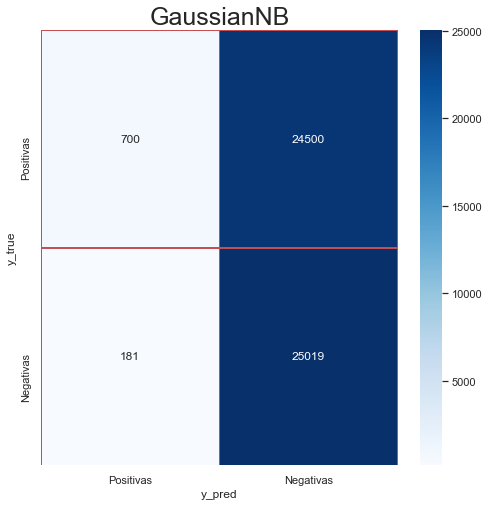

In [260]:
confusion(y1_test,y_test_pred,"GaussianNB")

**Como vemos la performace del modelo es muy baja, o el error es muy grande. Sobre todo genera un gran número de falsos positivos**

In [261]:
print(classification_report(y1_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.03      0.05     25200
           1       0.51      0.99      0.67     25200

    accuracy                           0.51     50400
   macro avg       0.65      0.51      0.36     50400
weighted avg       0.65      0.51      0.36     50400



**LinearSVC**

In [263]:
svc = LinearSVC(C = 0.1)
svc.fit(X1_train,y1_train)

y_train_pred = svc.predict(X1_train)
y_test_pred = svc.predict(X1_test)

print("Accuracy train LinearSVC: ", accuracy_score(y1_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y1_test, y_test_pred))

Accuracy train LinearSVC:  0.5143452380952381
Accuracy test LinearSVC:  0.5106349206349207


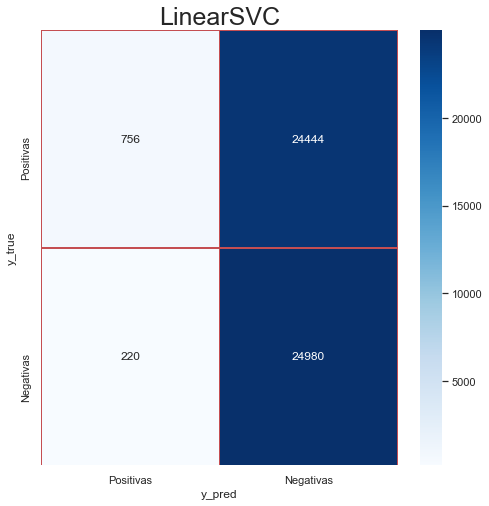

In [264]:
confusion(y1_test,y_test_pred,"LinearSVC")

**Como vemos la performace del modelo es muy baja, o el error es muy grande. Sobre todo genera un gran número de falsos positivos**

In [265]:
print(classification_report(y1_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.03      0.06     25200
           1       0.51      0.99      0.67     25200

    accuracy                           0.51     50400
   macro avg       0.64      0.51      0.36     50400
weighted avg       0.64      0.51      0.36     50400



## Analisis comparativo con el proyecto 3

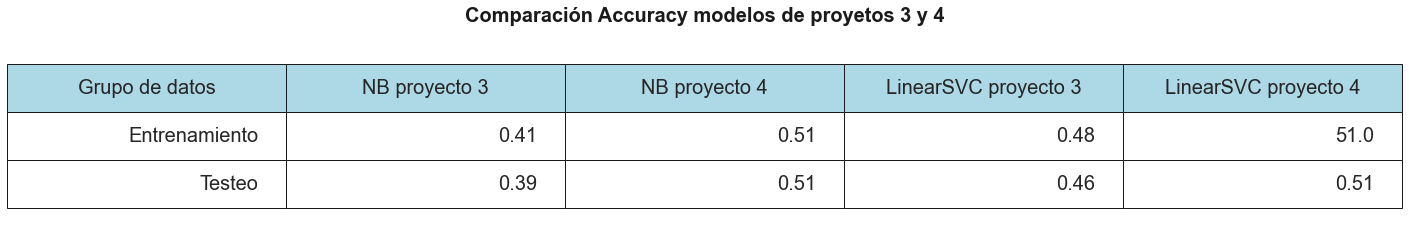

In [267]:
# Resumen de resultados PARTE A
# TABLA
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,4))

data=[['Entrenamiento', 0.41, 0.51, 0.48, 0.51], ['Testeo', 0.39, 0.51, 0.46, 0.51]
     ]
column_labels=['Grupo de datos','NB proyecto 3', 'NB proyecto 4', 'LinearSVC proyecto 3', 'LinearSVC proyecto 4']
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] *7,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Comparación Accuracy modelos de proyetos 3 y 4"
ax.set_title(f'{title}', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

Conclusión: En el proyecto 4 reducimos el número de etiquetas a positivas y negativas, sin ambargo, el accuracy de los algoritmos utilizados en el proyecto 3 no mejora significativamente. Solo se obtiene una pequeña mejora en desempeño y en el sobreajuste a los datos de entrenamiento.

## Analisis comparativo del desempeño en el analisis de sentimiento con el grupo de datos "review_body" y "review_title"

Para hacer este análisis voy a trabajar con otro método para separar los datos de entrenamiento y testeo, ya que con la clase train_test_split de sklearn tuve inconveniente con el grupo de datos "review_title". Voy a utilizar la misma metodología para ambos grupos de datos ya que puede afectar al Accuracy. Como esta nueva metodología no me permite trabajar con NB voy a incorporar otros modelos de clasificación para realizar el análasis comparativo.

## "review_body"

In [196]:
# random split train and test data
index = df_pos_neg_body.index
df_pos_neg_body['random_number'] = np.random.randn(len(index))
train_body = df_pos_neg_body[df_pos_neg_body['random_number'] <= 0.7]
test_body = df_pos_neg_body[df_pos_neg_body['random_number'] > 0.7]

In [199]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix_body = vectorizer.fit_transform(train_body['body_lema'])
test_matrix_body = vectorizer.transform(test_body['body_lema'])

In [300]:
all_words1 = vectorizer.get_feature_names()

In [301]:
# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words1[0:50])

50 palabras mas usadas:  ['abad', 'abajo', 'abalorio', 'abandona', 'abandonado', 'abandono', 'abanico', 'abarcar', 'abdel', 'abdomen', 'abdominal', 'abecedario', 'abeja', 'abejo', 'abel', 'aberracion', 'aberración', 'abertura', 'abierto', 'abiertofrasco', 'abla', 'ablandar', 'abollada', 'abollado', 'abolladura', 'abomba', 'abombado', 'abombo', 'abonado', 'abonar', 'abonir', 'abono', 'abonodevolucion', 'abortar', 'about', 'abox', 'abran', 'abrasivo', 'abrazadera', 'abrazaderar', 'abrazar', 'abrazo', 'abre', 'abreu', 'abri', 'abridor', 'abriga', 'abrigada', 'abrigado', 'abrigar']


In [220]:
X_train1 = train_matrix_body
X_test1= test_matrix_body
y_train1 = train_body['rev_neg0_pos1']
y_test1 = test_body['rev_neg0_pos1']

In [268]:
svc = LinearSVC(C = 1)
svc.fit(X_train1,y_train1)

y_train_pred = svc.predict(X_train1)
y_test_pred = svc.predict(X_test1)

print("Accuracy train LinearSVC: ", accuracy_score(y_train1, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test1, y_test_pred))

Accuracy train LinearSVC:  0.9240384086929896
Accuracy test LinearSVC:  0.8453719882853838


C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


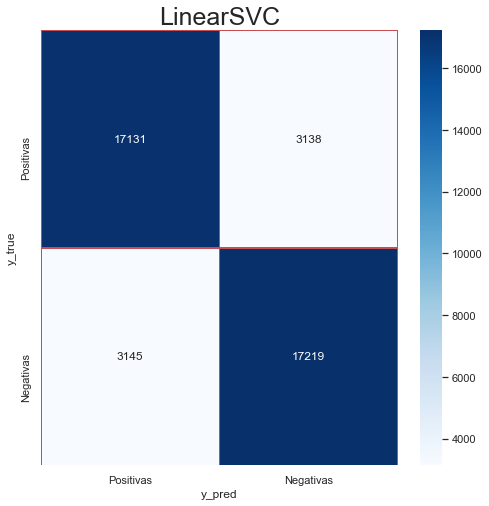

In [269]:
confusion(y_test1,y_test_pred,"LinearSVC")

**En es modelo vemos que mejora muchñisio el desempeño, se reducen los errores (falsos positivos y negativos) y además están más balanceados.** 

In [271]:
print(classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     20269
           1       0.85      0.85      0.85     20364

    accuracy                           0.85     40633
   macro avg       0.85      0.85      0.85     40633
weighted avg       0.85      0.85      0.85     40633



In [291]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
predictions_train = lr.predict(X_train1)
predictions_test = lr.predict(X_test1)


print("Accuracy train LinearSVC: ", accuracy_score(y_train1, predictions_train))
print("Accuracy test LinearSVC: ", accuracy_score(y_test1, predictions_test))

Accuracy train LinearSVC:  0.8982310959667732
Accuracy test LinearSVC:  0.8569635517928778


C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


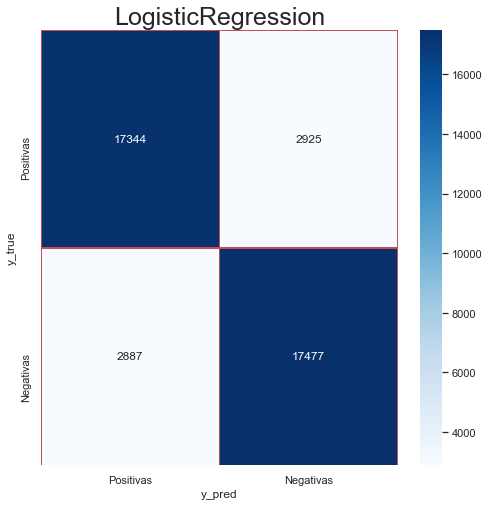

In [276]:
confusion(y_test1,predictions_test,"LogisticRegression")

**En es modelo vemos que mejora muchñisio el desempeño, se reducen los errores (falsos positivos y negativos) y además están más balanceados.** 

In [277]:
print(classification_report(predictions_test,y_test1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     20231
           1       0.86      0.86      0.86     20402

    accuracy                           0.86     40633
   macro avg       0.86      0.86      0.86     40633
weighted avg       0.86      0.86      0.86     40633



## review_title

In [278]:
# random split train and test data
index = df_pos_neg_title.index
df_pos_neg_title['random_number'] = np.random.randn(len(index))
train = df_pos_neg_title[df_pos_neg_title['random_number'] <= 0.7]
test = df_pos_neg_title[df_pos_neg_title['random_number'] > 0.7]

In [279]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['title_lema'])
test_matrix = vectorizer.transform(test['title_lema'])

In [280]:
X_train = train_matrix
X_test = test_matrix
y_train = train['rev_neg0_pos1']
y_test = test['rev_neg0_pos1']

In [281]:
svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accuracy train LinearSVC: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, y_test_pred))

Accuracy train LinearSVC:  0.8717952926501001
Accuracy test LinearSVC:  0.8300219043937637


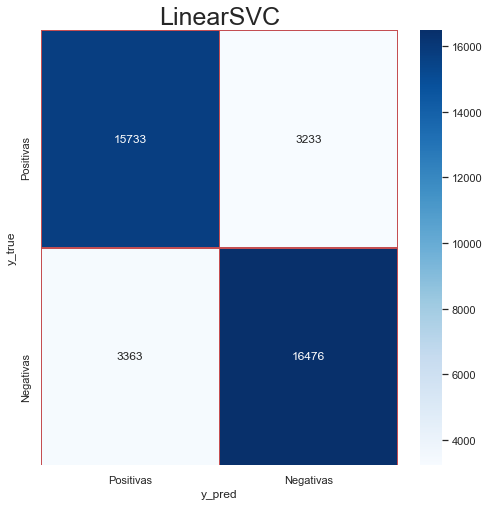

In [282]:
confusion(y_test,y_test_pred,"LinearSVC")

**Para este grupo de datos aumenta un poco el número de falsos positivos y negativos.** 

In [283]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     18966
           1       0.84      0.83      0.83     19839

    accuracy                           0.83     38805
   macro avg       0.83      0.83      0.83     38805
weighted avg       0.83      0.83      0.83     38805



In [290]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)


print("Accuracy train LinearSVC: ", accuracy_score(y_train, predictions_train))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, predictions_test))

Accuracy train LinearSVC:  0.8606588320257361
Accuracy test LinearSVC:  0.8321350341450844


C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


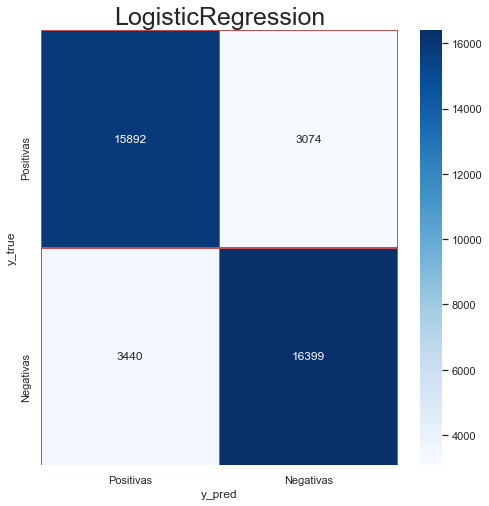

In [285]:
confusion(y_test,predictions_test,"LogisticRegression")

**Para este grupo de datos aumenta un poco el número de falsos positivos y negativos.** 

In [286]:
print(classification_report(predictions_test,y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     19332
           1       0.83      0.84      0.83     19473

    accuracy                           0.83     38805
   macro avg       0.83      0.83      0.83     38805
weighted avg       0.83      0.83      0.83     38805



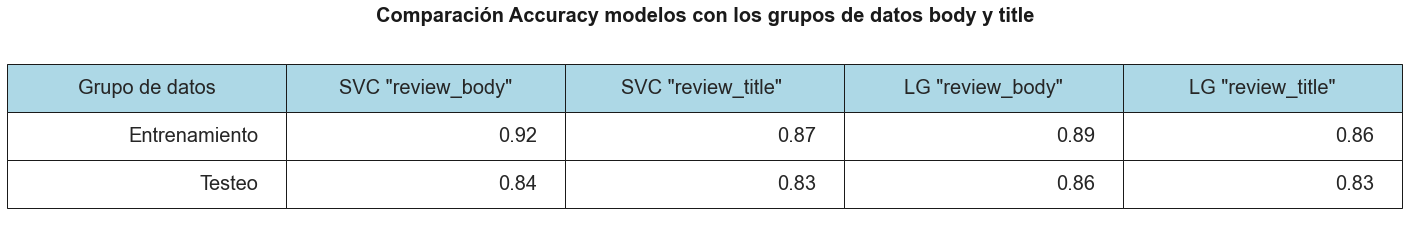

In [288]:
# Resumen de resultados PARTE A
# TABLA
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,4))

data=[['Entrenamiento', 0.92, 0.87, 0.89, 0.86], ['Testeo', 0.84, 0.83, 0.86, 0.83]
     ]
column_labels=['Grupo de datos','SVC "review_body"', 'SVC "review_title" ', 'LG "review_body"', 'LG "review_title"']
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
        colLabels=df.columns,       
        colColours =["lightblue"] *7,
        loc="center")

table.scale(1, 4)
table.set_fontsize(20)
ax.axis('off')
title = "Comparación Accuracy modelos con los grupos de datos body y title"
ax.set_title(f'{title}', weight='bold', size=20, color='k')

plt.savefig("demo_table.png", dpi=200, bbox_inches='tight')
plt.show()

**Claramente se puede ver que el modelo con mejor desempeño y menor sobreajuste a los datos de entrenamiento es elde Regresión Logística con el grupo de datos "review_body".**

## Opitmización de hiperparámetros

**LogisticRegression Optimizado con Randomizedsearch**

In [289]:
param_grid = [
    {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [292]:
from sklearn.model_selection import RandomizedSearchCV

hyper_lr = RandomizedSearchCV(lr, param_grid, n_iter=10, cv=5, random_state=0)

hyper_lr.fit(X_train, y_train)

C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Gabriel\miniconda3\lib\site-packages\sklearn

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=0)

In [293]:
print(hyper_lr.best_estimator_)

LogisticRegression(C=1.623776739188721, solver='liblinear')


In [294]:
print(hyper_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}


In [296]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver= 'liblinear', penalty='l2', C= 1.623776739188721, random_state=0)
lr.fit(X_train1, y_train1)
predictions_train = lr.predict(X_train1)
predictions_test = lr.predict(X_test1)


print("Accuracy train LinearSVC: ", accuracy_score(y_train1, predictions_train))
print("Accuracy test LinearSVC: ", accuracy_score(y_test1, predictions_test))

Accuracy train LinearSVC:  0.9059568019973776
Accuracy test LinearSVC:  0.8564467304899959


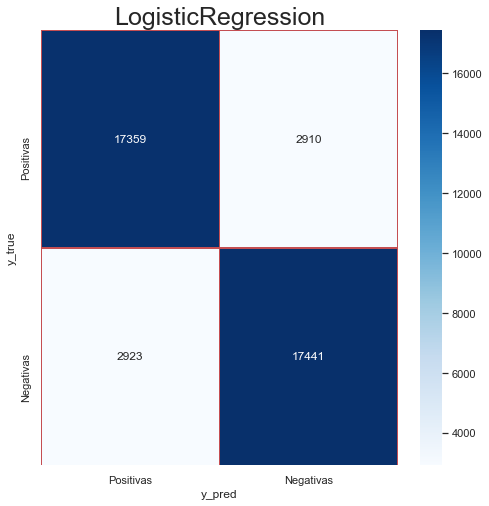

In [297]:
confusion(y_test1,predictions_test,"LogisticRegression")

In [277]:
print(classification_report(predictions_test,y_test1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     20231
           1       0.86      0.86      0.86     20402

    accuracy                           0.86     40633
   macro avg       0.86      0.86      0.86     40633
weighted avg       0.86      0.86      0.86     40633



**Conclussión de la optimización: Se genera un poco más de sobreajuste a los datos y aumentan muy poco los falsos negativos y positivos. Me quedaría con el modelo sin optimizar**

## GloVe Word Embeddings

GloVe is an unsupervised learning algorithm to learn vector representation i.e word embedding for various words. GloVe stands for Global Vectors for Word Representations. In this code, I will be using the 50-dimensional GloVe vectors for the task at hand.

In [368]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=c33df199fb241b71a683d7a5b80b4bf03a8bfc8daedf615dc121571c1279f725
  Stored in directory: c:\users\gabriel\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.7.3
    Uninstalling importlib-metadata-3.7.3:
      Successfully uninstalled importlib-metadata-3.7.3


In [369]:
from tensorflow import keras
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

In [370]:
x3=list(df_pos_neg_body['body_lema'].values)
y3=df_pos_neg_body['rev_neg0_pos1'].values

In [371]:
X3_train, X3_test,Y_train, Y_test = train_test_split(x3, y3, test_size=0.2, random_state = 45)

Now we will tokenize all the words in the train set, so the Tokenizer basically indexes all the words in the text and each word gets a unique index. This helps in creating dictionary mapping words to an index which will be very necessary to us later.

In [373]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X3_train)

words_to_index = tokenizer.word_index

words_to_index is the dictionary mapping words to their respective index.
Now we will write a function to read the contents of the GloVe Vector file, which returns us a dictionary that maps the words to their respective word embeddings.

In [375]:
def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
    for line in f:
        w_line = line.split()
        curr_word = w_line[0]
        word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



    return word_to_vec_map

We define maxLen which is the maximum length of one review we will use for our training, I have kept the value to be 150, we will pad this later so all the inputs have the same length

In [389]:
def __next__(self):
        line = self.f.readline().strip()
        if line == '':
            self.f.seek(0)
            raise StopIteration
        return line

In [395]:
#word_to_vec_map = read_glove_vector(r'C:\Users\Gabriel\OneDrive\Documentos\OneDrive\DATA SCIENCE\PROYECTOS\Proyecto 4\glove.6B.50d.txt')
#maxLen = 150

no puedo avanzar porque no se como resolver este erro "I/O operation on closed file" intente buscarlo pero no encuentro ninguna solución

## Embedding Matrix and setting up the Model

We defined the embedding matrix here, where all the words which are not in the GloVe dictionary being assigned a zero vector.

In [396]:
#vocab_len = len(words_to_index)
#embed_vector_len = word_to_vec_map['moon'].shape[0]

#emb_matrix = np.zeros((vocab_len, embed_vector_len))

#for word, index in words_to_index.items():
   # embedding_vector = word_to_vec_map.get(word)
   # if embedding_vector is not None:
        #emb_matrix[index, :] = embedding_vector

#embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)


## Conclución final

- EL análsis de los emoticones muestra que puden aportar información para dicriminar comentarios negativos de positivos. 
- En el análsis de frecuencia de plabras el grupo de datos "review_title" parece diferenciar mejor entre palabras negativas y positivas.
- El desempeño de los modelos de clasificación fue levemente mejor que en el proyecto 3
- El mejor modelo que fue el de Regresión Logistica sin optimizar hiperparámetros y con los datos de "review_body"

## Pendientes 

- Incorporar los emoticones al modelo
- avamzar con el análisis de GloVe Word Embeddings

**LINK AL REPOSITORIO DE GITHUB**

